# User Engagement Analysis

In [2]:
import os
import sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [3]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

In [5]:
# Load the cleaned xdr data into a DataFrame
data = pd.read_csv('../data/xdr_cleaned.csv', index_col=0)

In [6]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Social Media Total (Bytes),Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,4/25/2019 14:35,662.0,241983.25,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,8814393.0,36749741.0,308879636.0,1570185.0,2905912.0,3544322.25,18355943.0,17855187.0,2.924265e+08,180558843.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,4/25/2019 8:15,606.0,241983.25,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,15055145.0,53800391.0,653384965.0,1933278.0,4414096.0,937385.00,39359124.0,35565545.0,6.099208e+08,541959383.0
2,1.311448e+19,2019-04-09 17:42:00,49.0,4/25/2019 11:58,652.0,241983.25,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,4215763.0,27883638.0,279807335.0,1726277.0,10229119.0,3363124.00,34425237.0,23751202.0,2.304179e+08,414908351.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,4/25/2019 7:36,171.0,241983.25,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,12797283.0,43324218.0,834328852.0,657493.0,11811761.0,2070983.00,36534765.0,15096133.5,8.103879e+08,761837216.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,4/25/2019 10:40,947.0,241983.25,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,13910322.0,38542814.0,569138589.0,912788.0,7748843.0,2110349.00,34222253.0,18226068.5,5.312370e+08,564619822.0


In [7]:
from user_engagement_analysis import UserEngagementAnalysis
# Create an instance of the class
analysis = UserEngagementAnalysis(data)

# Define application traffic columns
applications = {
    'YouTube': ['Youtube DL (Bytes)', 'Youtube UL (Bytes)'],
    'Netflix': ['Netflix DL (Bytes)', 'Netflix UL (Bytes)'],
    'Gaming': ['Gaming DL (Bytes)', 'Gaming UL (Bytes)'],
    'Other': ['Other DL (Bytes)', 'Other UL (Bytes)']
}
# Initialize the analysis class
analysis = UserEngagementAnalysis(data)

# Aggregate metrics
analysis.aggregate_metrics()
analysis.metrics.head()

,MSISDN/Number,total_session_duration,total_download_traffic,total_upload_traffic,sessions_frequency
0,3.361370e+10,7.361193e+08,3.363551e+12,3.045255e+11,7418
1,3.361370e+10,5.264600e+04,7.300408e+08,8.586766e+07,2
2,3.361370e+10,6.574900e+04,1.489660e+09,7.713169e+07,2
3,3.361370e+10,1.312920e+05,7.455622e+07,5.645270e+07,1
4,3.361370e+10,2.419832e+05,4.891984e+08,3.382247e+07,1


In [8]:
# Report top customers
top_customers = analysis.report_top_customers()
print("Top 10 Customers by Sessions Frequency:", top_customers[0])
print("Top 10 Customers by Session Duration:", top_customers[1])
print("Top 10 Customers by Download Traffic:", top_customers[2])
print("Top 10 Customers by Upload Traffic:", top_customers[3])

Top 10 Customers by Sessions Frequency:        MSISDN/Number  total_session_duration  total_download_traffic  \
0       3.361370e+10            7.361193e+08            3.363551e+12   
95260   3.376819e+10            7.303022e+08            3.364043e+12   
7819    3.362632e+10            3.963598e+06            7.287455e+09   
762     3.361489e+10            3.856576e+06            8.091124e+09   
7475    3.362578e+10            4.088400e+06            7.724782e+09   
31235   3.365973e+10            3.461320e+06            7.092379e+09   
70367   3.367588e+10            3.300974e+06            7.308813e+09   
86854   3.376054e+10            3.362511e+06            7.851057e+09   
59193   3.366716e+10            3.076714e+06            5.087758e+09   
8286    3.362708e+10            2.751182e+06            5.309479e+09   

       total_upload_traffic  sessions_frequency  
0              3.045255e+11                7418  
95260          3.041065e+11                7418  
7819           6.

In [9]:
# Normalize and cluster
analysis.normalize_and_cluster(n_clusters=3)
print(analysis.metrics.head())

   MSISDN/Number  total_session_duration  total_download_traffic  \
0   3.361370e+10            7.361193e+08            3.363551e+12   
1   3.361370e+10            5.264600e+04            7.300408e+08   
2   3.361370e+10            6.574900e+04            1.489660e+09   
3   3.361370e+10            1.312920e+05            7.455622e+07   
4   3.361370e+10            2.419832e+05            4.891984e+08   

   total_upload_traffic  sessions_frequency  cluster  
0          3.045255e+11                7418        1  
1          8.586766e+07                   2        0  
2          7.713169e+07                   2        0  
3          5.645270e+07                   1        0  
4          3.382247e+07                   1        0  


In [10]:
# Cluster summary
cluster_summary = analysis.cluster_summary()
cluster_summary

,cluster_,sessions_frequency_min,sessions_frequency_max,sessions_frequency_mean,sessions_frequency_sum,total_session_duration_min,total_session_duration_max,total_session_duration_mean,total_session_duration_sum,total_download_traffic_min,total_download_traffic_max,total_download_traffic_mean,total_download_traffic_sum,total_upload_traffic_min,total_upload_traffic_max,total_upload_traffic_mean,total_upload_traffic_sum
0,0,1,3,1.209794,105188,20262.0,4.810292e+05,1.142542e+05,9.934063e+09,7.455622e+07,1.992887e+09,5.443384e+08,4.732859e+13,2.244628e+07,1.646634e+08,4.967638e+07,4.319212e+12
1,1,7418,7418,7418.000000,14836,730302182.0,7.361193e+08,7.332107e+08,1.466421e+09,3.363551e+12,3.364043e+12,3.363797e+12,6.727594e+12,3.041065e+11,3.045255e+11,3.043160e+11,6.086320e+11
2,2,2,18,3.407363,28322,60786.0,4.088400e+06,4.161342e+05,3.458908e+09,2.240812e+08,8.091124e+09,1.611813e+09,1.339739e+13,4.489257e+07,7.248050e+08,1.409723e+08,1.171761e+12


In [11]:
# Aggregate traffic per application
app_total_traffic, top_10_engaged_per_app = analysis.aggregate_traffic_per_application(applications=applications)
print("Total Traffic per Application:", app_total_traffic)
print("Top 10 Engaged Users per Application:", top_10_engaged_per_app)

Total Traffic per Application:   application  download_bytes  upload_bytes   total_bytes
0      Gaming    6.261886e+13  1.229855e+12  6.384872e+13
1     Netflix    1.724772e+12  1.632068e+12  3.356840e+12
2       Other    6.247781e+13  1.225735e+12  6.370355e+13
3     YouTube    1.725886e+12  1.633035e+12  3.358921e+12
Top 10 Engaged Users per Application:           MSISDN  download_bytes  upload_bytes application   total_bytes
0   3.361370e+10    3.122603e+12  6.101169e+10      Gaming  3.183615e+12
1   3.376819e+10    3.121426e+12  6.152340e+10      Gaming  3.182950e+12
2   3.361489e+10    7.573008e+09  1.272493e+08      Gaming  7.700257e+09
3   3.376054e+10    7.350510e+09  1.441438e+08      Gaming  7.494654e+09
4   3.362578e+10    7.144608e+09  1.533882e+08      Gaming  7.297996e+09
5   3.367588e+10    6.863307e+09  1.074453e+08      Gaming  6.970752e+09
6   3.362632e+10    6.726535e+09  1.423192e+08      Gaming  6.868855e+09
7   3.365973e+10    6.611019e+09  1.157518e+08      Gamin

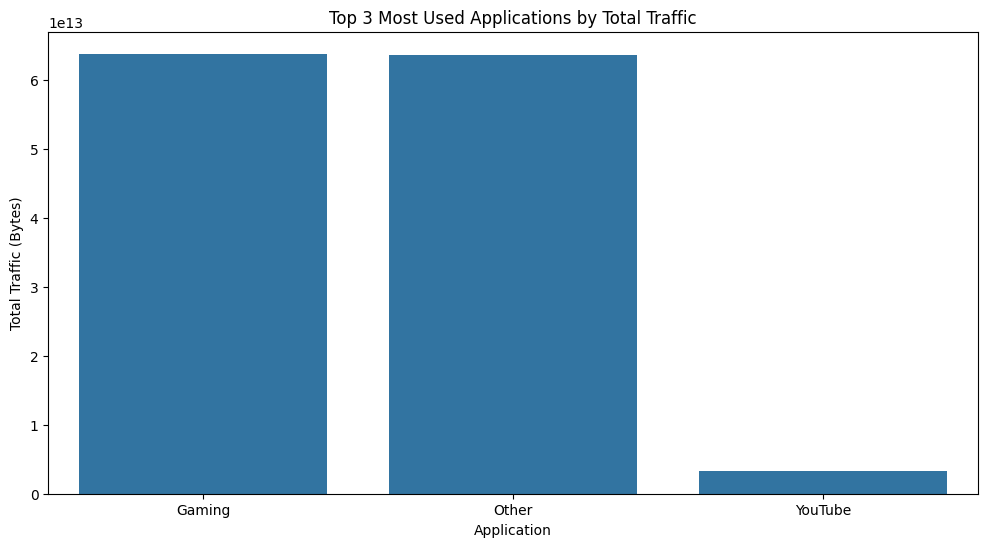

In [12]:
# Plot top applications 
top_3_apps = app_total_traffic.nlargest(3, 'total_bytes')
analysis.plot_top_applications(top_3_apps)

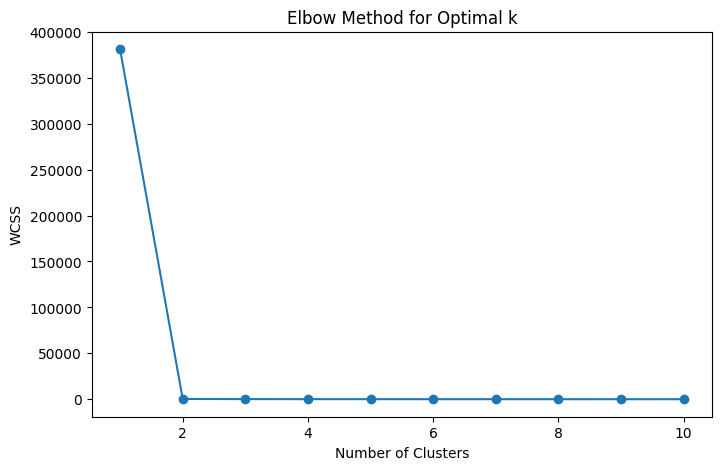

In [13]:
# Elbow method for determining optimal number of clusters
analysis.elbow_method()